In [1]:
import bagpipes as pipes
import numpy as np
import pandas as pd

Bagpipes: Latex distribution not found, plots may look strange.


In [2]:
path_z = 'cosmos_3dhst.v4.1.cats/Eazy/cosmos_3dhst.v4.1.zout'
path_cat = 'cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat'

In [3]:
data_cat = np.genfromtxt(path_cat)
columns = np.loadtxt('column_names.txt', dtype=str)

In [4]:
#data_cat.shape

In [5]:
df = pd.DataFrame(data = data_cat, columns = columns)

In [6]:
reduced_df = df[['f_F606W', 'e_F606W', 'f_F814W', 'e_F814W', 'f_F140W', 'e_F140W', 'f_F160W', 'e_F160W', 
                 'f_IRAC1', 'e_IRAC1', 'f_IRAC2', 'e_IRAC2', 'f_IRAC3', 'e_IRAC3', 'f_IRAC4', 'e_IRAC4']]

In [7]:
def correct_flux(flux):
    '''
    Function that converts the flux given in the cosmos catalog into fluxes that bagpipes
    can use which is microjansky. 
    
    Noting that the fluxes presented in the cosmos catalog are in: M_AB = 25 - 2.5log10(flux)
    and that the def of M_AB in jansky is: M_AB = 8.90 - 2.5log10(f_nu) I got the conversion factor below
    '''
    if flux < 0:
        return -99
    else:
        exponent = (25 - 8.9)/2.5
        conv = 10 ** (-exponent)
        proper_flux = flux * conv * 1e6
        
        return proper_flux

In [8]:
filters = np.array(['f_F606W', 'f_F814W', 'f_F140W', 'f_F160W', 'f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4',
           'e_F606W', 'e_F814W', 'e_F140W', 'e_F160W', 'e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4'])

In [9]:
def load_data(ID):
    '''
    This function gets passed into the Bagpipes fit class and what this will return
    is photometry data in the form of a 2D array with 2 columns w/ column1 = fluxes
    and column2 = flux_err.
    
    Parameter
    -----------------
    ID: string, float, int representing the ID number of the target you want to fit 
    
    Returns
    -----------------
    phot_2d_arr: 2d array of flux and flux errors for the filters I have.
    '''
    
    #getting the row value index
    row = int(ID) - 1
    
    #making empty list to hold flux and flux_err
    flux = []
    flux_err = []
    
    #filters in the dataframe
    filters = np.array(['f_F606W', 'f_F814W', 'f_F140W', 'f_F160W', 'f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4',
           'e_F606W', 'e_F814W', 'e_F140W', 'e_F160W', 'e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4'])
    
    #looping through the filters in the dataframe columns
    for filt in filters:
        
        #if it is an error append to the error list
        if 'e_' in filt:
            f_obs = reduced_df.loc[row][filt]
            proper_f = correct_flux(f_obs)
            flux_err.append(proper_f)
        else:
            f_obs = reduced_df.loc[row][filt]
            proper_f = correct_flux(f_obs)
            flux.append(proper_f)
    
    #making the two list into a 2d array
    phot_2d_arr = np.c_[flux, flux_err]
    
    #checking to see if I got some negative values cause that is no bueno and if I do
    #i set flux = 0 and blow up the error to a really high number
    
    for idx in range(len(phot_2d_arr)):
        if phot_2d_arr[idx][0] < 0 or phot_2d_arr[idx][1] < 0:
            phot_2d_arr[idx] = np.array([0, 9e99]) 
    
    return phot_2d_arr

In [10]:
path = 'pipes/filters'
test_filt = [path +'/HST_Filters/ACS_f606w.txt', path +'/HST_Filters/ACS_f814w.txt', path +'/HST_Filters/wfc_f140w.txt', path +'/HST_Filters/wfc_f160w.txt', 
             path +'/IRAC_Filters/IRAC_36_filt.txt', path +'/IRAC_Filters/IRAC_45_filt.txt', path +'/IRAC_Filters/IRAC_58_filt.txt', path +'/IRAC_Filters/IRAC_80_filt.txt']

In [13]:
#sphot = load_data(321)

In [14]:
#flux = sphot[:, 0]
#flux_err = sphot[:, 1]

In [15]:
#plt.plot()

In [16]:
#galaxy = pipes.galaxy(321, load_data, spectrum_exists=False, filt_list = test_filt)

In [17]:
#galaxy.plot()

In [18]:
#Model Building
#model_delayedexp = {}
#model_delayedexp ['age'] = (.1, 15)
##model_delayedexp ['tau'] = (.3, 10)
#model_delayedexp ["metallicity"] = (0., 2.5)   
#model_delayedexp ["massformed"] = (1., 13.)  

#dust = {}                                 # Dust component
#dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
#dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#fit_instructions = {}
#fit_instructions['delayed'] = model_delayedexp
#fit_instructions['redshift'] = (0., 10)
#fit_instructions['dust'] = dust

In [19]:
#fit = pipes.fit(galaxy, fit_instructions)

In [20]:
#fit.fit(verbose=None)

In [21]:
#fig = fit.plot_spectrum_posterior(save=False, show=True)

In [22]:
#fig = fit.plot_sfh_posterior(save=False, show=True)

In [11]:
data_z = np.loadtxt(path_z, usecols=(0, 1, 2, 5, 17, 19))

In [97]:
#data_z

array([[ 0.8855,  3.067 ,  3.067 ,  3.0674,  3.0609],
       [ 0.8855,  3.233 ,  3.233 ,  3.2266,  3.1859],
       [-1.    ,  0.817 ,  0.817 ,  0.8131,  0.8242],
       ...,
       [-1.    ,  0.01  ,  0.01  ,  0.0165,  0.0136],
       [-1.    ,  4.996 ,  4.996 ,  4.9787,  4.9539],
       [-1.    ,  5.961 ,  5.961 ,  5.8629,  5.6376]])

In [12]:
#data_z_12 = np.where((data_z[:, 1] > 1) & (data_z[:, 1] < 2))

In [13]:
#data_z_12

In [14]:
#data_z_23 = np.where((data_z[:, 1] > 2) & (data_z[:, 1] < 3))

In [15]:
#data_z_34 = np.where((data_z[:, 1] > 3) & (data_z[:, 1] < 4))

In [16]:
#data_z_34

In [18]:
#redshift_12_gal = df.iloc[data_z_12][filters]

In [19]:
#redshift_12_gal

In [20]:
#redshift_23_gal = df.iloc[data_z_23][filters]

In [21]:
#redshift_34_gal = df.iloc[data_z_34][filters]

In [23]:
#redshift_34_gal

In [27]:
def load_data_z12(ID):
    '''
    This function gets passed into the Bagpipes fit class and what this will return
    is photometry data in the form of a 2D array with 2 columns w/ column1 = fluxes
    and column2 = flux_err.
    
    Parameter
    -----------------
    ID: string, float, int representing the ID number of the target you want to fit 
    
    Returns
    -----------------
    phot_2d_arr: 2d array of flux and flux errors for the filters I have.
    '''
    
    #getting the row value index
    row = int(ID) - 1
    
    #making empty list to hold flux and flux_err
    flux = []
    flux_err = []
    
    #filters in the dataframe
    filters = np.array(['f_F606W', 'f_F814W', 'f_F140W', 'f_F160W', 'f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4',
           'e_F606W', 'e_F814W', 'e_F140W', 'e_F160W', 'e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4'])
    
    #looping through the filters in the dataframe columns
    for filt in filters:
        
        #if it is an error append to the error list
        if 'e_' in filt:
            f_obs = redshift_12_gal.iloc[row][filt]
            proper_f = correct_flux(f_obs)
            flux_err.append(proper_f)
        else:
            f_obs = redshift_12_gal.iloc[row][filt]
            proper_f = correct_flux(f_obs)
            flux.append(proper_f)
    
    #making the two list into a 2d array
    phot_2d_arr = np.c_[flux, flux_err]
    
    #checking to see if I got some negative values cause that is no bueno and if I do
    #i set flux = 0 and blow up the error to a really high number
    
    for idx in range(len(phot_2d_arr)):
        if phot_2d_arr[idx][0] < 0 or phot_2d_arr[idx][1] < 0:
            phot_2d_arr[idx] = np.array([0, 9e99]) 
    
    return phot_2d_arr

In [119]:
len(data_z_12[0])

10360

In [28]:
z12_actual = data_z[data_z_12[0][186]]
z12_galaxy = pipes.galaxy(186, load_data_z12, spectrum_exists=False, filt_list = test_filt)

#Model Building 
model = {}
model['age'] = (.01, 13)
model['tau'] = (.02, 14)
model["metallicity"] = (0., 2.5)   
model["massformed"] = (1., 13.)  

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#more complex dust modeling
##dust["qpah"] = (.01, 5.)          # PAH mass fraction
#dust["umin"] = (0., 4.)         # Lower limit of starlight intensity distribution
#dust["gamma"] = (0., 1.)      # Fraction of stars at umin

#nebular = {}
#nebular["logU"] = (1, 4.)


fit_instructions = {}
fit_instructions['delayed'] = model
fit_instructions['redshift'] = (0., 10)
fit_instructions['dust'] = dust

fit = pipes.fit(z12_galaxy, fit_instructions)

fit.fit()


Bagpipes: fitting object 186


Completed in 113.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    1.016      2.023      3.399
delayed:massformed            10.288     10.401     10.510
delayed:metallicity            0.250      0.426      0.656
delayed:tau                    3.576      7.855     12.054
dust:Av                        0.586      0.761      0.980
redshift                       1.410      1.532      1.807




In [31]:
z12_actual

array([-1.    ,  2.87  ,  0.196 ,  2.853 ,  2.9449])

In [35]:
def load_data_z23(ID):
    '''
    This function gets passed into the Bagpipes fit class and what this will return
    is photometry data in the form of a 2D array with 2 columns w/ column1 = fluxes
    and column2 = flux_err.
    
    Parameter
    -----------------
    ID: string, float, int representing the ID number of the target you want to fit 
    
    Returns
    -----------------
    phot_2d_arr: 2d array of flux and flux errors for the filters I have.
    '''
    
    #getting the row value index
    row = int(ID) - 1
    
    #making empty list to hold flux and flux_err
    flux = []
    flux_err = []
    
    #filters in the dataframe
    filters = np.array(['f_F606W', 'f_F814W', 'f_F140W', 'f_F160W', 'f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4',
           'e_F606W', 'e_F814W', 'e_F140W', 'e_F160W', 'e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4'])
    
    #looping through the filters in the dataframe columns
    for filt in filters:
        
        #if it is an error append to the error list
        if 'e_' in filt:
            f_obs = redshift_23_gal.iloc[row][filt]
            proper_f = correct_flux(f_obs)
            flux_err.append(proper_f)
        else:
            f_obs = redshift_23_gal.iloc[row][filt]
            proper_f = correct_flux(f_obs)
            flux.append(proper_f)
    
    #making the two list into a 2d array
    phot_2d_arr = np.c_[flux, flux_err]
    
    #checking to see if I got some negative values cause that is no bueno and if I do
    #i set flux = 0 and blow up the error to a really high number
    
    for idx in range(len(phot_2d_arr)):
        if phot_2d_arr[idx][0] < 0 or phot_2d_arr[idx][1] < 0:
            phot_2d_arr[idx] = np.array([0, 9e99]) 
    
    return phot_2d_arr

In [40]:
redshift_23_gal.iloc[32]

f_F606W     0.809579
f_F814W     0.782553
f_F140W   -99.000000
f_F160W     1.721219
f_IRAC1     1.336905
f_IRAC2     1.081225
f_IRAC3    -3.756406
f_IRAC4     5.866224
e_F606W     0.035055
e_F814W     0.044308
e_F140W   -99.000000
e_F160W     0.082001
e_IRAC1     0.185695
e_IRAC2     0.206572
e_IRAC3     4.776441
e_IRAC4     4.876658
Name: 240, dtype: float64

In [45]:
z23_actual = data_z[data_z_23[0][10]]
z23_galaxy = pipes.galaxy(10, load_data_z23, spectrum_exists=False, filt_list = test_filt)

#Model Building 
model = {}
model['age'] = (.01, 13)
model['tau'] = (.02, 14)
model["metallicity"] = (0., 2.5)   
model["massformed"] = (1., 13.)  

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#more complex dust modeling
##dust["qpah"] = (.01, 5.)          # PAH mass fraction
#dust["umin"] = (0., 4.)         # Lower limit of starlight intensity distribution
#dust["gamma"] = (0., 1.)      # Fraction of stars at umin

#nebular = {}
#nebular["logU"] = (1, 4.)



fit_instructions = {}
fit_instructions['delayed'] = model
fit_instructions['redshift'] = (0., 10)
fit_instructions['dust'] = dust

fit = pipes.fit(z23_galaxy, fit_instructions)

fit.fit()


Results loaded from pipes/posterior/./10.h5

Fitting not performed as results have already been loaded from pipes/posterior/./10.h5. To start over delete this file or change run.



In [47]:
data_z_23[0][10]

92

In [46]:
z23_actual

array([93.    , -1.    ,  2.333 ,  1.705 ,  2.2892,  2.3455])

In [43]:
data_z

array([[ 1.0000e+00,  8.8550e-01,  3.0670e+00,  3.0670e+00,  3.0674e+00,
         3.0609e+00],
       [ 2.0000e+00,  8.8550e-01,  3.2330e+00,  3.2330e+00,  3.2266e+00,
         3.1859e+00],
       [ 3.0000e+00, -1.0000e+00,  8.1700e-01,  8.1700e-01,  8.1310e-01,
         8.2420e-01],
       ...,
       [ 3.3877e+04, -1.0000e+00,  1.0000e-02,  1.0000e-02,  1.6500e-02,
         1.3600e-02],
       [ 3.3878e+04, -1.0000e+00,  4.9960e+00,  4.9960e+00,  4.9787e+00,
         4.9539e+00],
       [ 3.3879e+04, -1.0000e+00,  5.9610e+00,  5.9610e+00,  5.8629e+00,
         5.6376e+00]])

In [17]:
galaxy = pipes.galaxy(1000, load_data, spectrum_exists=False, filt_list = test_filt)

In [29]:
#galaxy.plot()

In [18]:
#Model Building 
model = {}
model['age'] = (.01, 13)
model['tau'] = (.02, 14)
model["metallicity"] = (0., 2.5)   
model["massformed"] = (1., 13.)  

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#more complex dust modeling
##dust["qpah"] = (.01, 5.)          # PAH mass fraction
#dust["umin"] = (0., 4.)         # Lower limit of starlight intensity distribution
#dust["gamma"] = (0., 1.)      # Fraction of stars at umin

#nebular = {}
#nebular["logU"] = (1, 4.)


fit_instructions = {}
fit_instructions['delayed'] = model
fit_instructions['redshift'] = (0., 10)
fit_instructions['dust'] = dust
#fit_instructions['nebular'] = nebular

In [19]:
fit = pipes.fit(galaxy, fit_instructions)

In [20]:
fit.fit()


Bagpipes: fitting object 1000


Completed in 196.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    4.379      7.710     10.883
delayed:massformed             8.174      8.433      8.648
delayed:metallicity            0.519      0.659      0.773
delayed:tau                    0.401      1.134      1.849
dust:Av                        0.028      0.099      0.228
redshift                       0.074      0.097      0.122




In [21]:
data_z[999]

array([ 1.000e+03, -1.000e+00,  2.450e-01,  2.450e-01,  2.395e-01,
        2.416e-01])

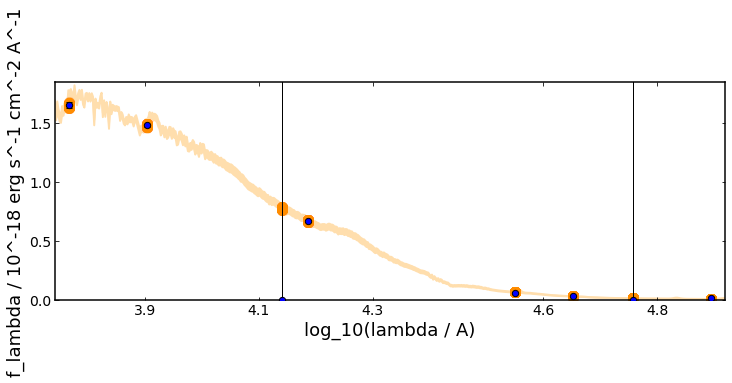

In [22]:
fig = fit.plot_spectrum_posterior(save=False, show=True)

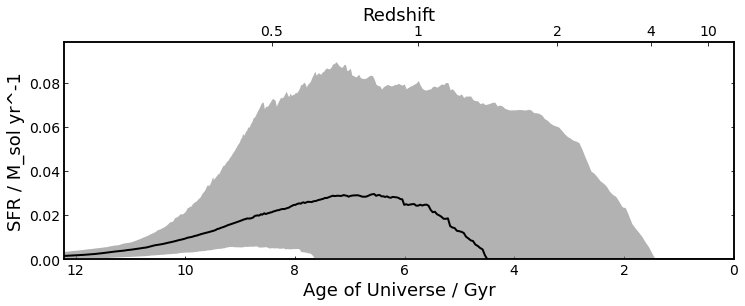

In [24]:
fig = fit.plot_sfh_posterior(save=False, show=True)

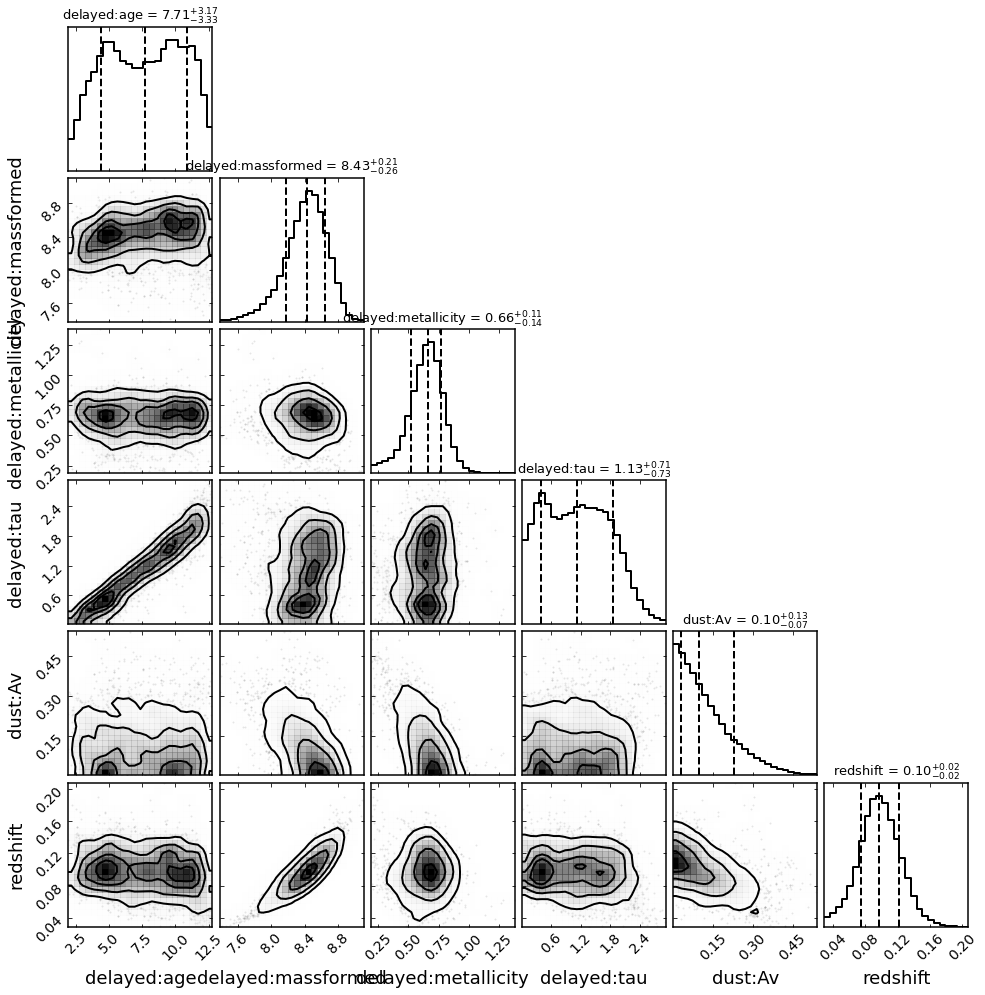

In [23]:
fig = fit.plot_corner(save=False, show=True)

In [28]:
key = fit.posterior.samples.keys()

In [33]:
key

dict_keys(['delayed:age', 'delayed:massformed', 'delayed:metallicity', 'delayed:tau', 'dust:Av', 'redshift', 'stellar_mass', 'formed_mass', 'sfr', 'ssfr', 'nsfr', 'mass_weighted_age', 'tform', 'tquench', 'sfh', 'photometry', 'spectrum_full', 'uvj', 'chisq_phot', 'dust_curve'])

In [36]:
gal_prop = []

for prop in key:
    print(type(prop))
    if prop == 'photometry' or prop =='uvj':
        continue
    elif prop == 'spectrum_full' or prop == 'sfh':
        continue
    elif prop == 'mass_weighted_age' or prop == 'dust_curve':
        continue
    elif prop == 'tquench' or prop == 'tform':
        continue
    else:
        gal_prop.append(prop)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [37]:
gal_prop

['delayed:age',
 'delayed:massformed',
 'delayed:metallicity',
 'delayed:tau',
 'dust:Av',
 'redshift',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'chisq_phot']

In [32]:
for i in list(fit.posterior.samples):
    
    print(str(i), ': ', round(np.median(fit.posterior.samples[str(i)]), 3))

dust:Av :  0.875
lognormal:fwhm :  9.996
lognormal:massformed :  10.423
lognormal:metallicity :  0.347
lognormal:tmax :  7.675
redshift :  1.549
stellar_mass :  10.215
formed_mass :  10.423
sfr :  26.933
ssfr :  -8.726
nsfr :  0.651
mass_weighted_age :  0.597
tform :  3.179
tquench :  99.0
sfh :  14.553
photometry :  0.0
spectrum_full :  0.0
uvj :  0.59
chisq_phot :  6.427
dust_curve :  1.077


In [33]:
fit.posterior.samples.keys()

dict_keys(['dust:Av', 'lognormal:fwhm', 'lognormal:massformed', 'lognormal:metallicity', 'lognormal:tmax', 'redshift', 'stellar_mass', 'formed_mass', 'sfr', 'ssfr', 'nsfr', 'mass_weighted_age', 'tform', 'tquench', 'sfh', 'photometry', 'spectrum_full', 'uvj', 'chisq_phot', 'dust_curve'])

In [34]:
import matplotlib.pyplot as plt

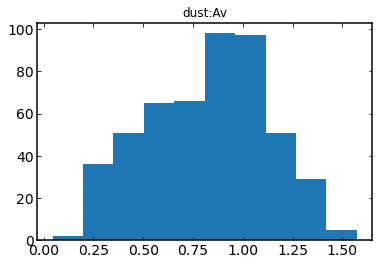

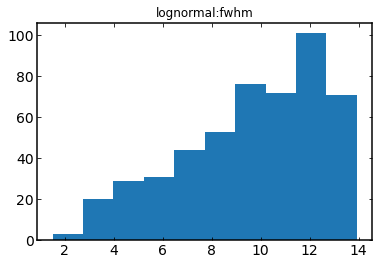

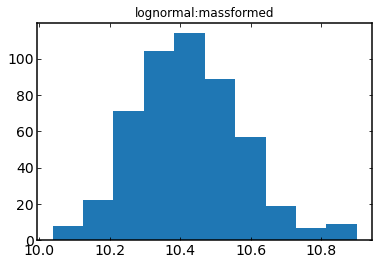

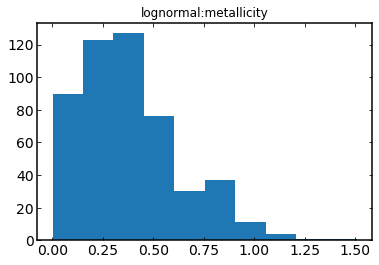

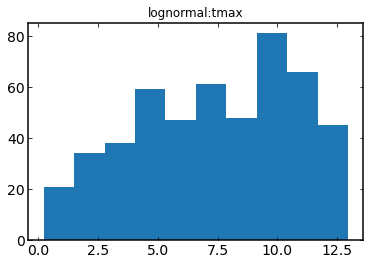

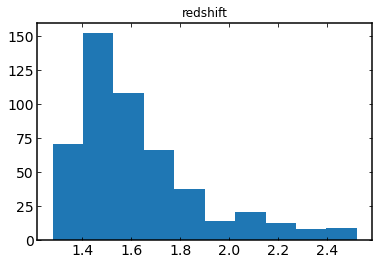

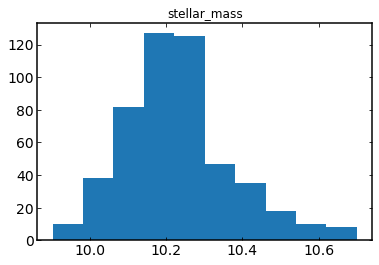

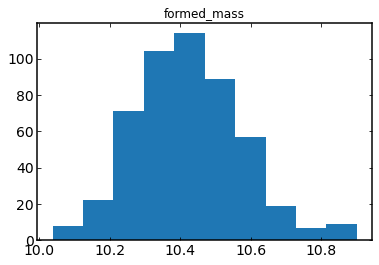

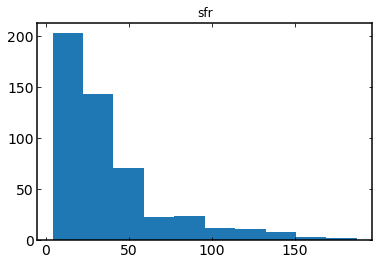

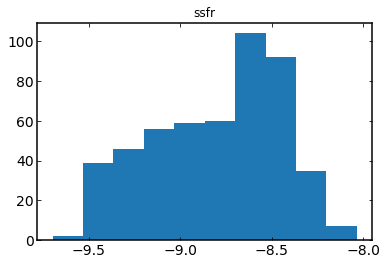

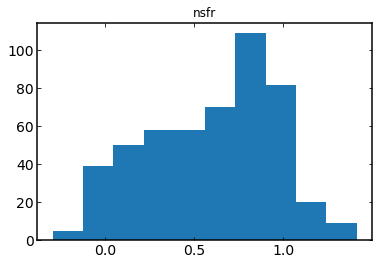

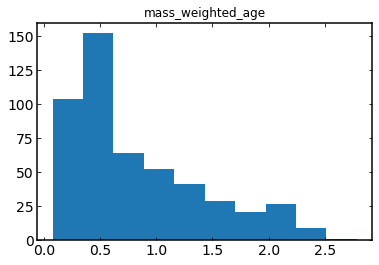

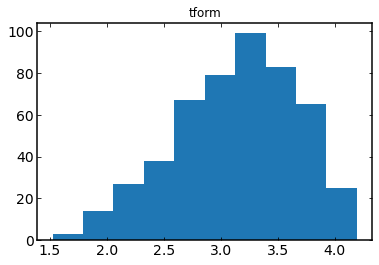

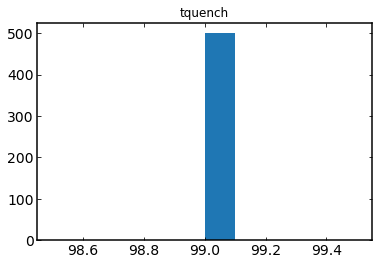

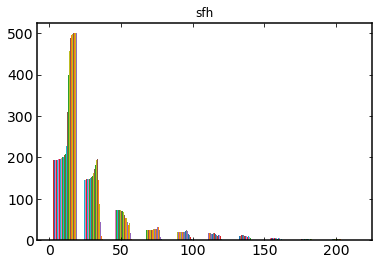

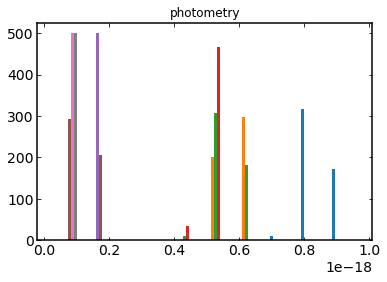

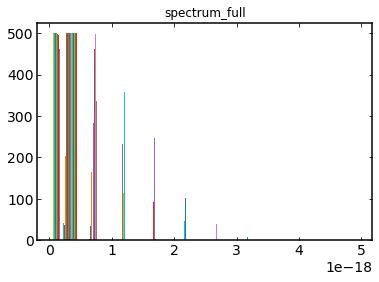

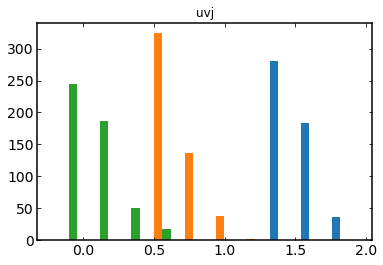

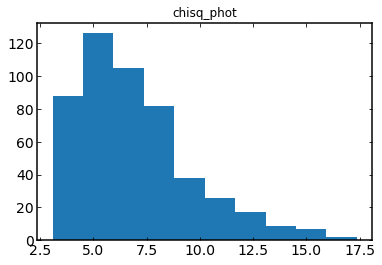

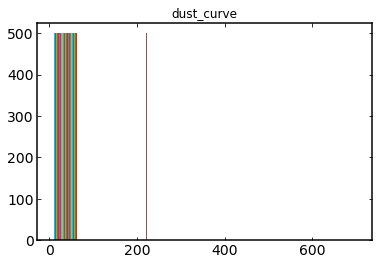

In [35]:
for i in fit.posterior.samples.keys():
    
    plt.title(str(i))
    plt.hist(fit.posterior.samples[str(i)])
    plt.show()
    print()

In [36]:
fit.posterior.samples['photometry'].shape

(500, 8)

In [37]:
fit.posterior.

SyntaxError: invalid syntax (<ipython-input-37-c379085f6f98>, line 1)

In [35]:
galaxy1 = pipes.galaxy(367, load_data, spectrum_exists=False, filt_list = test_filt)

In [36]:
#Model Building 
model = {}
model['age'] = (.01, 13)
model['tau'] = (.02, 14)
model["metallicity"] = (0., 2.5)   
model["massformed"] = (1., 13.)  

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#more complex dust modeling
##dust["qpah"] = (.01, 5.)          # PAH mass fraction
#dust["umin"] = (0., 4.)         # Lower limit of starlight intensity distribution
#dust["gamma"] = (0., 1.)      # Fraction of stars at umin

#nebular = {}
#nebular["logU"] = (1, 4.)


fit_instructions = {}
fit_instructions['delayed'] = model
fit_instructions['redshift'] = (0., 10)
fit_instructions['dust'] = dust
#fit_instructions['nebular'] = nebular

In [38]:
fit1 = pipes.fit(galaxy1, fit_instructions)

In [39]:
fit1.fit()


Bagpipes: fitting object 367


Completed in 258.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    2.680      2.928      3.515
delayed:massformed            11.499     11.529     11.558
delayed:metallicity            0.874      1.057      1.276
delayed:tau                    0.505      0.579      0.805
dust:Av                        0.724      0.869      1.044
redshift                       0.845      0.874      0.893




In [41]:
data_z[366]

array([-1.    ,  0.948 ,  0.948 ,  0.9477,  0.9453])

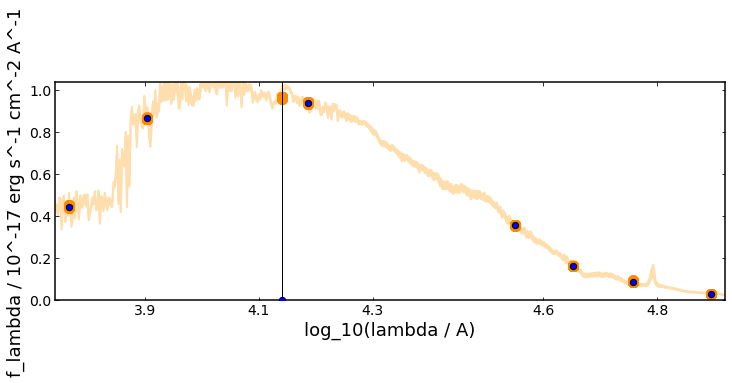

In [42]:
fig = fit1.plot_spectrum_posterior(save=False, show=True)

In [43]:
fit1.posterior.get_advanced_quantities()

In [44]:
fit.posterior.get_advanced_quantities()
list(fit.posterior.samples)

['delayed:age',
 'delayed:massformed',
 'delayed:metallicity',
 'delayed:tau',
 'dust:Av',
 'redshift',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'mass_weighted_age',
 'tform',
 'tquench',
 'sfh',
 'photometry',
 'spectrum_full',
 'uvj',
 'chisq_phot',
 'dust_curve']

In [58]:
import matplotlib.pyplot as plt

In [62]:
fit1.posterior.samples['photometry'][min_chi_sq_idx]

array([4.43003054e-18, 8.65098827e-18, 9.62177527e-18, 9.35373116e-18,
       3.53589828e-18, 1.62912246e-18, 8.50912457e-19, 2.92741644e-19])

delayed:age


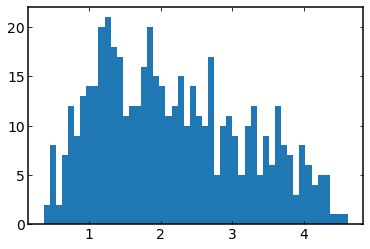



-----------------


delayed:massformed


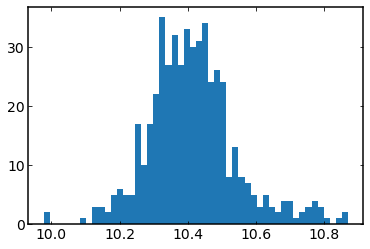



-----------------


delayed:metallicity


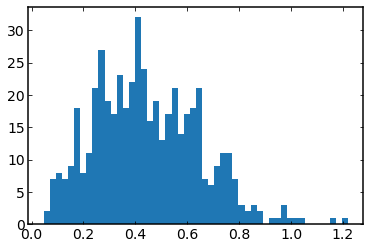



-----------------


delayed:tau


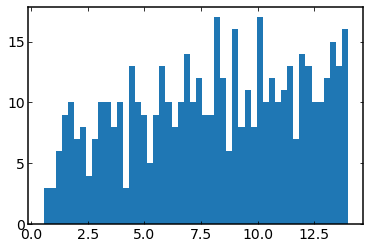



-----------------


dust:Av


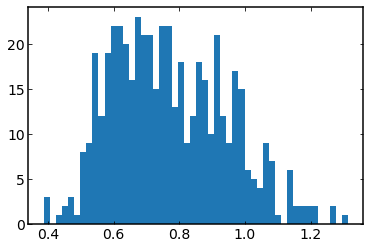



-----------------


redshift


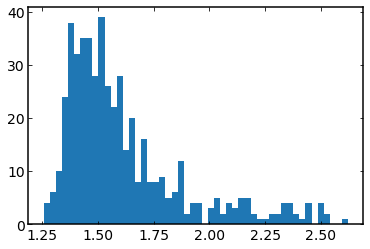



-----------------


stellar_mass


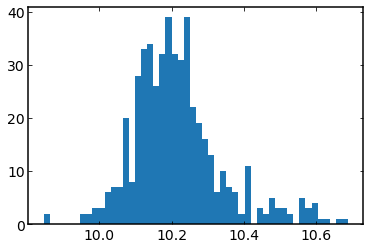



-----------------


formed_mass


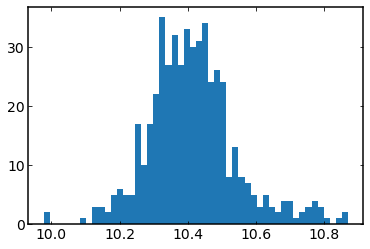



-----------------


sfr


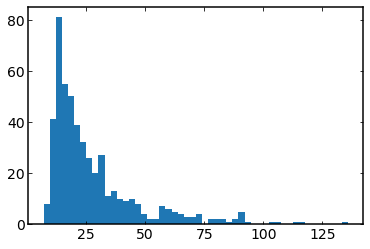



-----------------


ssfr


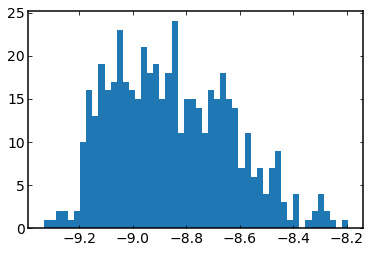



-----------------


nsfr


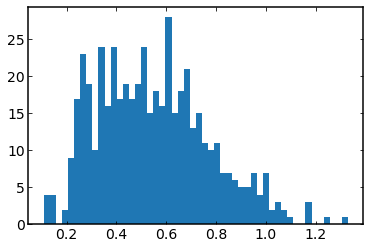



-----------------


mass_weighted_age


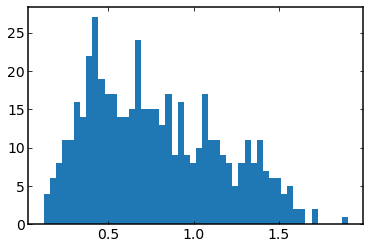



-----------------


tform


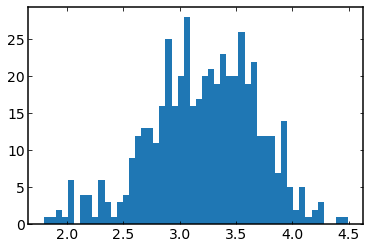



-----------------


tquench


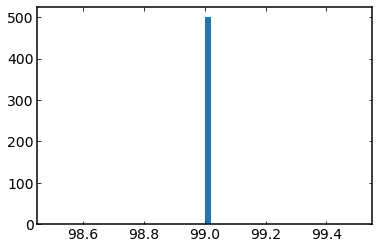



-----------------


sfh


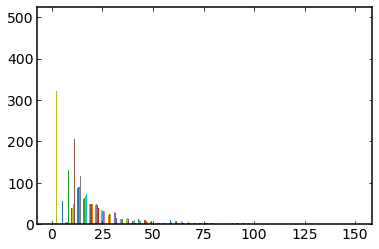



-----------------


photometry


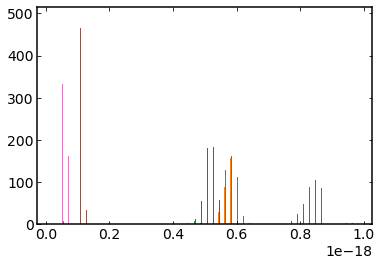



-----------------


spectrum_full


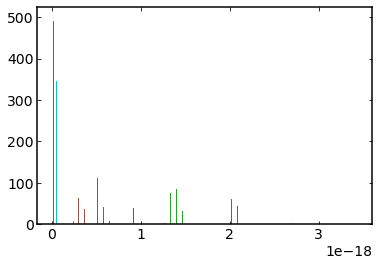



-----------------


uvj


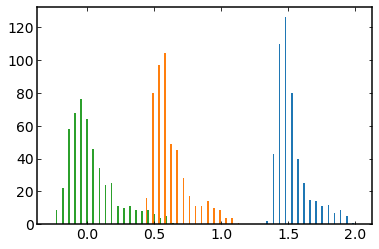



-----------------


chisq_phot


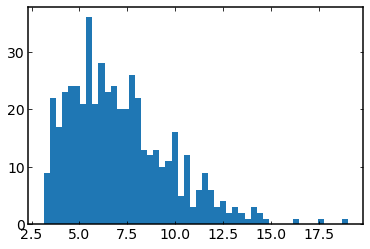



-----------------


dust_curve


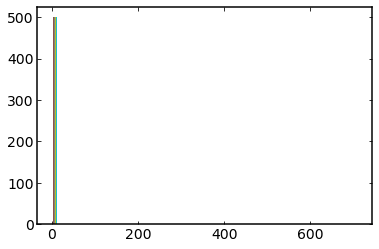



-----------------




In [59]:
for attribute in list(fit1.posterior.samples):
    print(str(attribute))
    plt.hist(fit1.posterior.samples[str(attribute)], bins = 50)
    plt.show()
    
    print()
    print()
    print('-----------------')
    print()
    print()

In [51]:
min_chi_sq_idx = np.argmin(fit1.posterior.samples['chisq_phot'])

In [56]:
fit1.posterior.samples['chisq_phot'][min_chi_sq_idx]

0.8200504697299558

In [57]:
np.min(fit1.posterior.samples['chisq_phot'])

0.8200504697299558

In [52]:
loopwe = ['delayed:age', 'delayed:massformed', 'delayed:metallicity', 'delayed:tau', 'dust:Av', 'redshift', 'formed_mass']

In [55]:
for i in loopwe:
    print(i, ' ---------- ', fit1.posterior.samples[i][min_chi_sq_idx])

delayed:age  ----------  2.788771262361375
delayed:massformed  ----------  11.525973219115835
delayed:metallicity  ----------  1.1909033836602487
delayed:tau  ----------  0.5291213613696674
dust:Av  ----------  0.7794350524837895
redshift  ----------  0.8849198671725018
formed_mass  ----------  11.525973219115835


NameError: name 'plt' is not defined

In [66]:
def load_Steve_data(ID):
    '''
    This function gets passed into the Bagpipes fit class and what this will return
    is photometry data in the form of a 2D array with 2 columns w/ column1 = fluxes
    and column2 = flux_err.
    
    Parameter
    -----------------
    ID: string, float, int representing the ID number of the target you want to fit 
    
    Returns
    -----------------
    phot_2d_arr: 2d array of flux and flux errors for the filters I have.
    '''
    
    #getting the row value index
    row = int(ID) - 1
    
    #filters in the dataframe
    phot_flux = np.loadtxt('Steve_Phot_Data.txt', usecols=(1)) 
    
    phot_flux *= 1e29
    phot_err = np.array([x/5 for x in phot_flux])
    
    #making the two list into a 2d array
    phot_2d_arr = np.c_[phot_flux, phot_err]
    
    return phot_2d_arr

In [67]:
steve_galaxy = pipes.galaxy(21, load_Steve_data, spectrum_exists=False, filt_list = test_filt)

In [68]:
#Model Building 
model = {}
model['age'] = (.01, 13)
model['tau'] = (.02, 14)
model["metallicity"] = (0., 2.5)   
model["massformed"] = (1., 13.)  

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

#more complex dust modeling
##dust["qpah"] = (.01, 5.)          # PAH mass fraction
#dust["umin"] = (0., 4.)         # Lower limit of starlight intensity distribution
#dust["gamma"] = (0., 1.)      # Fraction of stars at umin

#nebular = {}
#nebular["logU"] = (1, 4.)


fit_instructions = {}
fit_instructions['delayed'] = model
fit_instructions['redshift'] = (0., 10)
fit_instructions['dust'] = dust

In [84]:
steve_galaxy_data = load_Steve_data(32)

In [69]:
fit = pipes.fit(steve_galaxy, fit_instructions)

In [70]:
fit.fit()


Bagpipes: fitting object 21


Completed in 80.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    0.258      0.485      0.946
delayed:massformed             9.911     10.178     10.418
delayed:metallicity            0.328      0.842      1.703
delayed:tau                    2.978      7.482     11.966
dust:Av                        0.034      0.111      0.262
redshift                       1.463      2.012      2.437




In [74]:
#plt.hist(fit.posterior.samples['redshift'])

In [80]:
#making the bagpipes model

#here I used the delayed_exponential
model_delayedexp = {}
model_delayedexp ['age'] = .485
model_delayedexp ['tau'] = 7.482
model_delayedexp ["metallicity"] = .842
model_delayedexp ["massformed"] = 10.178  

dust = {}                               
dust["type"] = "Calzetti"                
dust["Av"] = .111                    

model_components = {}
model_components['redshift'] = 2.012
model_components['delayed'] = model_delayedexp
model_components['dust'] = dust

In [81]:
galaxy_median = pipes.model_galaxy(model_components=model_components, filt_list = test_filt, phot_units='mujy')

In [82]:
phot_median = galaxy_median.photometry

In [83]:
phot_median

array([5.49941694, 4.95313906, 6.59362187, 6.46821039, 6.87077333,
       7.08628722, 6.61217428, 4.16715774])

In [87]:
for i in range(len(phot_median)):
    print(' %.3f ------------------ %.3f' %(phot_median[i], steve_galaxy_data[i, 0]))

 5.499 ------------------ 6.156
 4.953 ------------------ 5.630
 6.594 ------------------ 6.950
 6.468 ------------------ 6.772
 6.871 ------------------ 7.222
 7.086 ------------------ 7.401
 6.612 ------------------ 7.399
 4.167 ------------------ 4.341
